1. **Importação de Bibliotecas**
   Importa as bibliotecas necessárias para a análise e visualização dos dados.


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



2. **Carregamento de Dados**  
   Carrega o conjunto de dados e aplica uma função para classificar os tipos de anúncios.

In [2]:
df = pd.read_csv("miro_dados_limpos_desde_janeiro.csv")

In [3]:

# Função para classificar os anúncios
def classificar_anuncio(nome):
    nome = str(nome).lower()  # Converte para string e para minúsculas
    if "carrossel" in nome:
        if "feed" in nome:
            return "CARROSSEL FEED"
        elif "story" in nome or "stories" in nome:
            return "CARROSSEL STORY"
        else:
            return "CARROSSEL"
    elif "video" in nome:
        return "VIDEO"
    elif "imagem" in nome and ("story" in nome or "stories" in nome):
        return "IMAGENS STORIES"
    elif "story" in nome or "stories" in nome:
        return "STORY"
    else:
        return "OUTROS"

df["Tipo de anúncio"] = df["Nome do anúncio"].apply(classificar_anuncio)


3. **Extração e Formatação de Data**  
   Extrai e formata a data a partir do nome dos anúncios, criando uma nova coluna com a data de criação.


In [4]:
# Função para extrair e formatar a data
def extrair_data(nome):
    nome = str(nome)

    # Expressão regular para datas nos formatos dd/mm/aaaa, dd-mm-aaaa, dd/mm/aa, dd-mm-aa
    padrao_data = r"(\d{2})[-/](\d{2})[-/](\d{2}(\d{2})?)"
    padrao_ano = r"\b(20\d{2})\b"  # Para capturar apenas o ano, como "2024"

    # Verificar se há uma data completa no formato dd/mm/aaaa ou similar
    match = re.search(padrao_data, nome)

    if match:
        dia, mes, ano = match.groups()[0], match.groups()[1], match.groups()[2]

        # Ajustar o ano para o formato completo (ex: 24 -> 2024)
        if len(ano) == 2:
            ano = "20" + ano

        return f"{dia}/{mes}/{ano}"

    # Se não encontrou data completa, verificar se há apenas o ano
    match_ano = re.search(padrao_ano, nome)
    if match_ano:
        ano = match_ano.group(1)
        return f"01/01/{ano}"

    # Retornar data padrão quando não encontrar uma data válida
    return "00/00/2024"


# Criar a nova coluna "Data de Criação" com a data extraída do "Nome do anúncio"
df["Data de Criação"] = df["Nome do anúncio"].apply(extrair_data)

4. **Tratamento de Dados Faltantes**
   Substitui valores NaN por 0 nas colunas numéricas para evitar problemas na análise.

In [5]:
# Substituir NaN por 0 apenas nas colunas numéricas
df[df.select_dtypes(include=["number"]).columns] = df.select_dtypes(
    include=["number"]
).fillna(0)



5. **Visualização de Resultados por Tipo de Anúncio**  
   Cria um gráfico de barras para comparar os resultados médios entre diferentes tipos de anúncios.


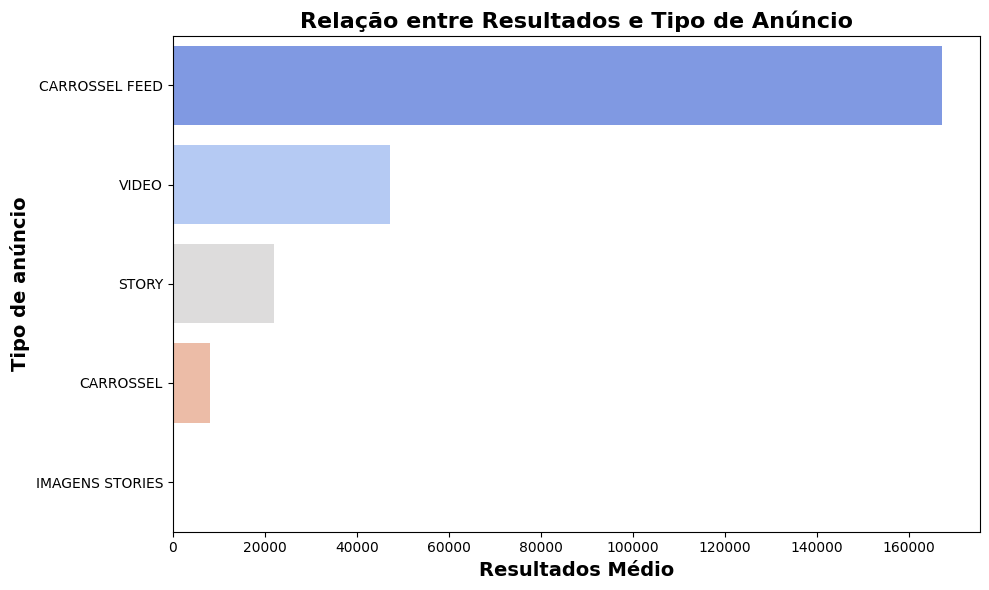

In [6]:
# Calcular o Resultados médio por classificação e ordenar do maior para o menor
Resultados_por_classificacao = df.groupby("Tipo de anúncio")["Resultados"].mean().sort_values(ascending=False)

# Criar o gráfico de barras horizontal para o Resultados Médio por Classificação
plt.figure(figsize=(10, 6))
sns.barplot(
    x=Resultados_por_classificacao.values,
    y=Resultados_por_classificacao.index,
    palette="coolwarm",
)

# Configurações do gráfico
plt.title("Relação entre Resultados e Tipo de Anúncio", fontsize=16, fontweight="bold")
plt.xlabel("Resultados Médio", fontsize=14, fontweight="bold")
plt.ylabel("Tipo de anúncio", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()



6. **Visualização de Alcance por Tipo de Anúncio**  
   Compara o alcance médio dos anúncios por tipo, identificando o tipo de anúncio com maior alcance.

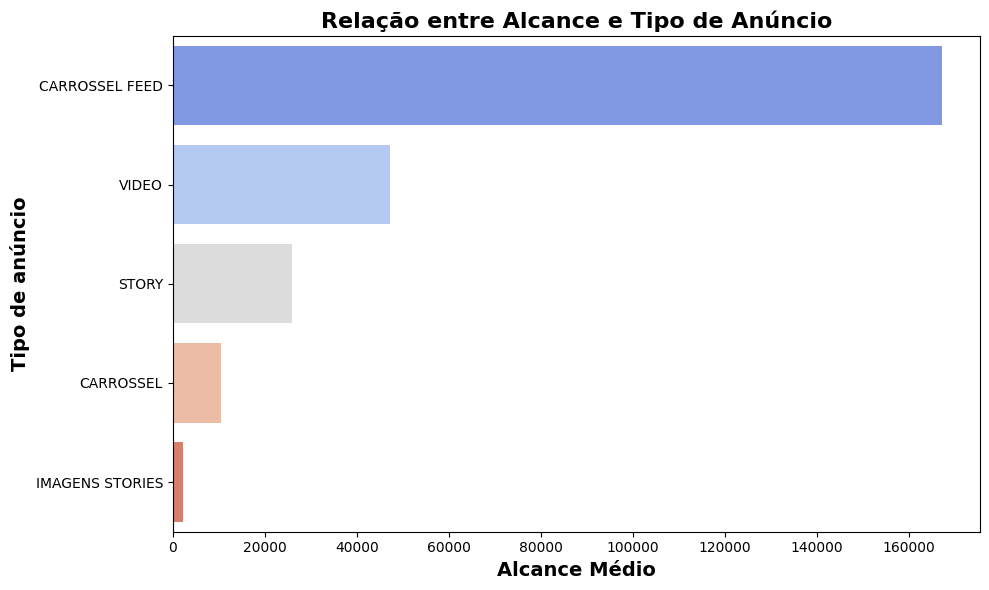

In [7]:
# Calcular o alcance médio por classificação e ordenar do maior para o menor
alcance_por_classificacao = df.groupby("Tipo de anúncio")["Alcance"].mean().sort_values(ascending=False)

# Criar o gráfico de barras horizontal para o Alcance Médio por Classificação
plt.figure(figsize=(10, 6))
sns.barplot(
    x=alcance_por_classificacao.values,
    y=alcance_por_classificacao.index,
    palette="coolwarm",
)

# Configurações do gráfico
plt.title("Relação entre Alcance e Tipo de Anúncio", fontsize=16, fontweight="bold")
plt.xlabel("Alcance Médio", fontsize=14, fontweight="bold")
plt.ylabel("Tipo de anúncio", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()




7. **Visualização de Valor Investido por Tipo de Anúncio**  
   Exibe o valor médio investido em cada tipo de anúncio, ajudando a entender os custos por categoria.

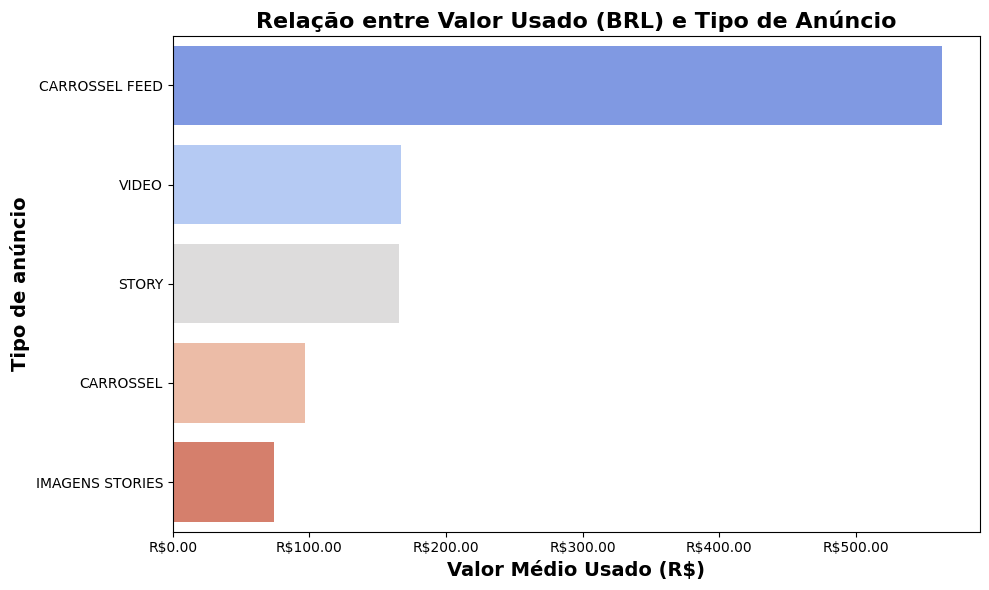

In [8]:
# Calcular o valor médio usado por classificação e ordenar do maior para o menor
valor_usado_por_classificacao = df.groupby("Tipo de anúncio")["Valor usado (BRL)"].mean().sort_values(ascending=False)

# Criar o gráfico de barras horizontal para o Valor Médio Usado por Classificação
plt.figure(figsize=(10, 6))
sns.barplot(
    x=valor_usado_por_classificacao.values,
    y=valor_usado_por_classificacao.index,
    palette="coolwarm",
)

# Configurações do gráfico
plt.title("Relação entre Valor Usado (BRL) e Tipo de Anúncio", fontsize=16, fontweight="bold")
plt.xlabel("Valor Médio Usado (R$)", fontsize=14, fontweight="bold")
plt.ylabel("Tipo de anúncio", fontsize=14, fontweight="bold")

# Formatação do eixo X para moeda brasileira
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter("R${x:,.2f}"))

plt.tight_layout()
plt.show()




8. **Visualização de CTR por Tipo de Anúncio**  
   Mostra a taxa média de cliques (CTR) para cada tipo de anúncio, permitindo avaliar o engajamento.


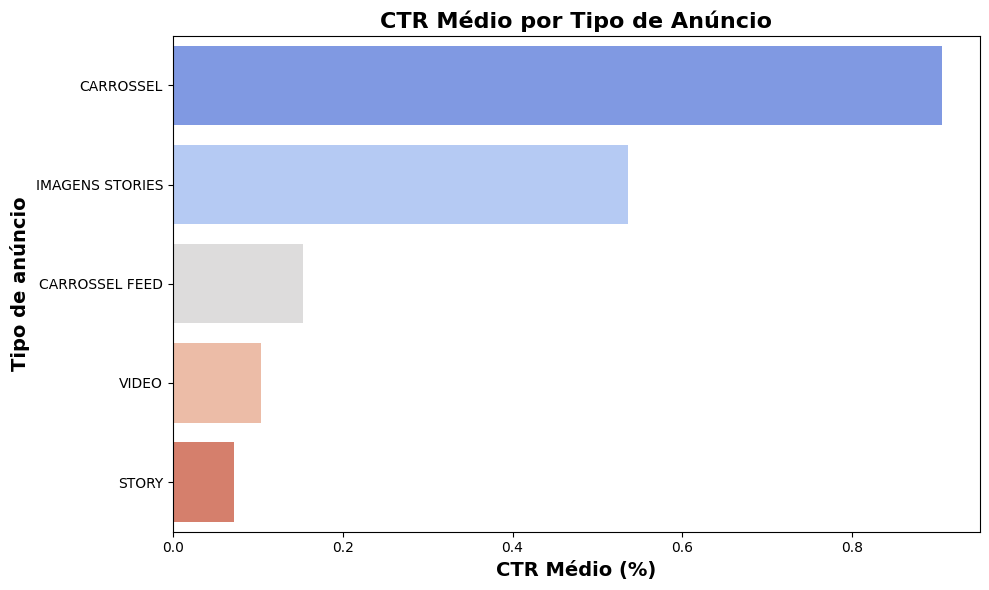

In [9]:

# Calcular o CTR médio por classificação e ordenar do maior para o menor
ctr_por_classificacao = df.groupby("Tipo de anúncio")["CTR (todos)"].mean().sort_values(ascending=False)

# Gráfico de barras horizontal para o CTR Médio por Classificação
plt.figure(figsize=(10, 6))
sns.barplot(
    x=ctr_por_classificacao.values,
    y=ctr_por_classificacao.index,
    palette="coolwarm"
)

# Títulos e Rótulos com Negrito
plt.title("CTR Médio por Tipo de Anúncio", fontsize=16, fontweight="bold")
plt.xlabel("CTR Médio (%)", fontsize=14, fontweight="bold")
plt.ylabel("Tipo de anúncio", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()



9. **Visualização de CPC por Tipo de Anúncio**  
   Visualiza o custo por clique médio (CPC) por tipo de anúncio, oferecendo insights sobre o custo da publicidade.

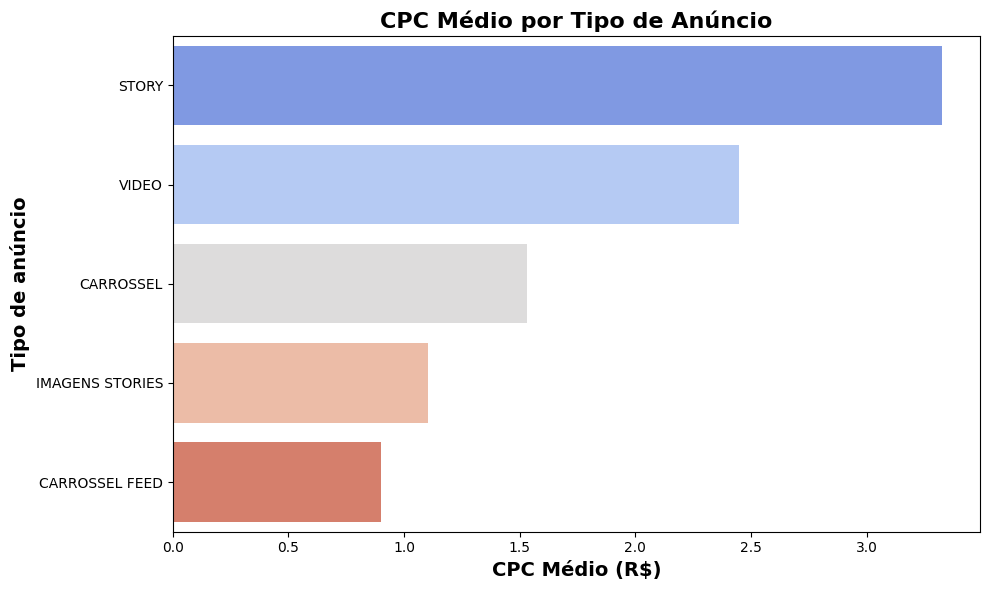

In [10]:
# Calcular o CPC médio por classificação
cpc_por_classificacao = df.groupby("Tipo de anúncio")["CPC (todos)"].mean().sort_values(ascending=False)

# Gráfico de barras horizontal para o CPC por Classificação
plt.figure(figsize=(10, 6))
sns.barplot(
    y=cpc_por_classificacao.index, x=cpc_por_classificacao.values, palette="coolwarm"
)
plt.title("CPC Médio por Tipo de Anúncio", fontsize=16, fontweight="bold")
plt.xlabel("CPC Médio (R$)", fontsize=14, fontweight="bold")
plt.ylabel("Tipo de anúncio", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()



10. **Visualização de Frequência por Tipo de Anúncio**  
    Compara a frequência média de exibição dos anúncios por tipo, analisando a exposição ao público.

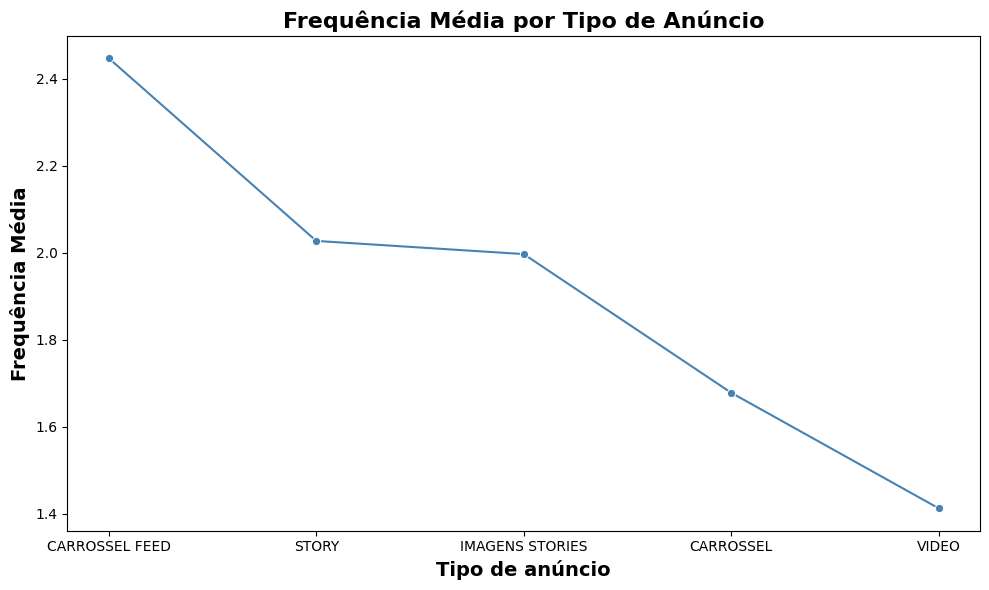

In [11]:
# Calcular a frequência média por classificação
frequencia_por_classificacao = df.groupby("Tipo de anúncio")["Frequência"].mean().sort_values(ascending=False)

# Gráfico de linha para Frequência por Classificação com formatação consistente
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=frequencia_por_classificacao.index,
    y=frequencia_por_classificacao.values,
    marker="o",
    color="steelblue",
)

# Títulos e Rótulos com Negrito
plt.title("Frequência Média por Tipo de Anúncio", fontsize=16, fontweight="bold")
plt.xlabel("Tipo de anúncio", fontsize=14, fontweight="bold")
plt.ylabel("Frequência Média", fontsize=14, fontweight="bold")

# Ajustar rotação do eixo X para horizontal
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()



11. **Visualização de Impressões por Tipo de Anúncio**  
    Exibe as impressões médias por tipo de anúncio, indicando a visibilidade de cada tipo.

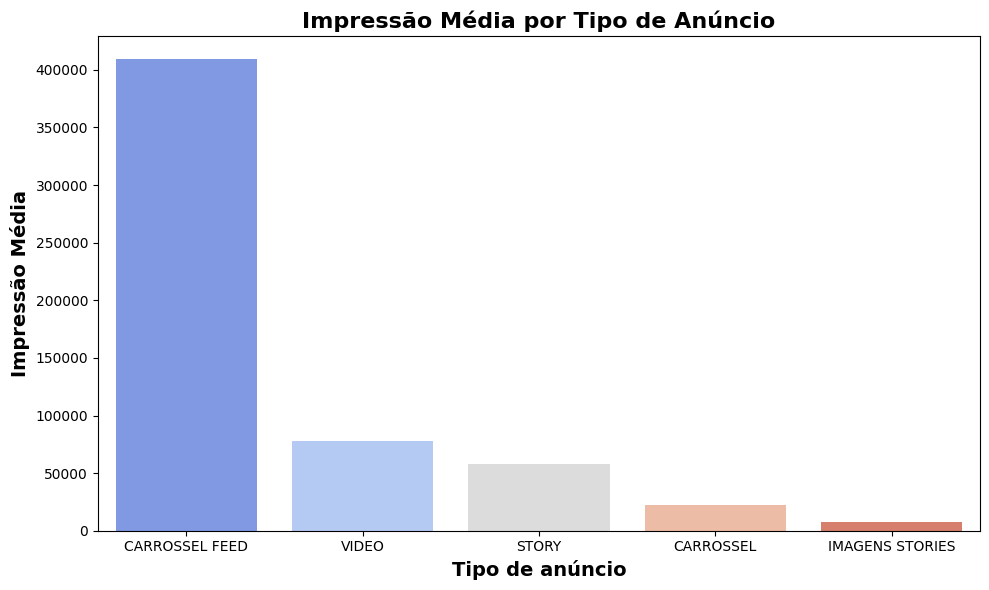

In [12]:
# Calcular a impressão média por classificação
impressao_media_por_classificacao = df.groupby("Tipo de anúncio")["Impressões"].mean().sort_values(ascending=False)

# Criar o gráfico de barras para Impressão Média por Classificação
plt.figure(figsize=(10, 6))
sns.barplot(
    x=impressao_media_por_classificacao.index,
    y=impressao_media_por_classificacao.values,
    palette="coolwarm",
)

# Configurações do gráfico
plt.title("Impressão Média por Tipo de Anúncio", fontsize=16, fontweight="bold")
plt.xlabel("Tipo de anúncio", fontsize=14, fontweight="bold")
plt.ylabel("Impressão Média", fontsize=14, fontweight="bold")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()



12. **Visualização de Custo por Resultado por Tipo de Anúncio**  
    Analisa o custo médio por resultado para cada tipo de anúncio, ajudando a identificar a eficiência dos investimentos.

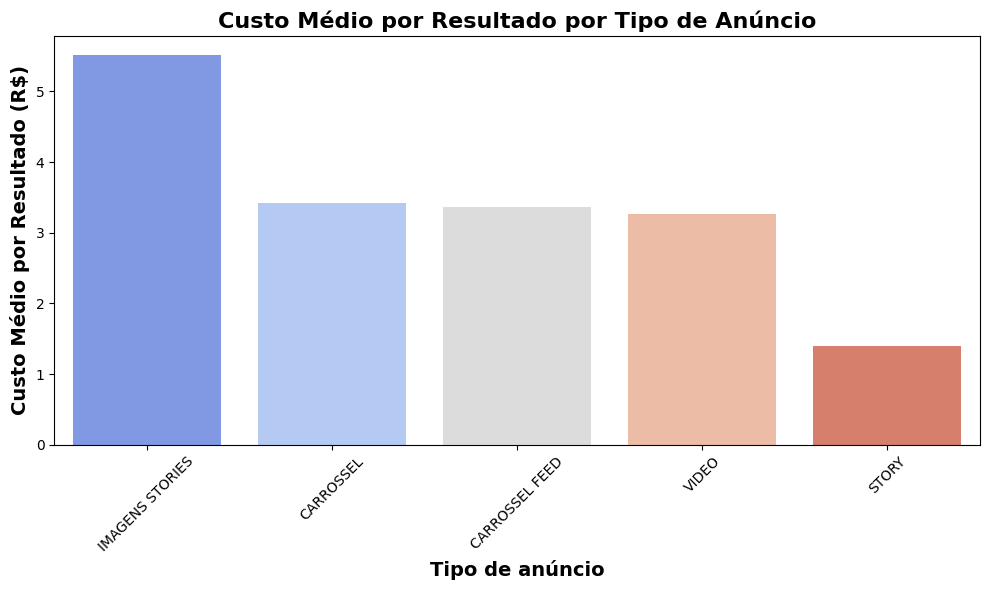

In [13]:
# Certifique-se de que a coluna "Custo por resultado" não tenha valores NaN, substituindo-os por 0
df["Custo por resultado"] = df["Custo por resultado"].fillna(0)

# Calcular o custo médio por resultado por classificação
custo_por_resultado_classificacao = df.groupby("Tipo de anúncio")[
    "Custo por resultado"
].mean().sort_values(ascending=False)

# Gráfico de barras para Custo por Resultado por Classificação
plt.figure(figsize=(10, 6))
sns.barplot(
    x=custo_por_resultado_classificacao.index,
    y=custo_por_resultado_classificacao.values,
    palette="coolwarm",
)
plt.title("Custo Médio por Resultado por Tipo de Anúncio", fontsize=16, fontweight="bold")
plt.xlabel("Tipo de anúncio", fontsize=14, fontweight="bold")
plt.ylabel("Custo Médio por Resultado (R$)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



13. **Manipulação Geral de Dados**  
    Conclui a análise com manipulações finais no conjunto de dados.

A métrica **Performance_Score** é uma pontuação agregada que combina o desempenho dos anúncios em três métricas principais: **Valor Usado (BRL)**, **Alcance**, e **Resultados**. O objetivo dessa métrica é fornecer uma visão geral do desempenho de cada anúncio, permitindo a identificação dos melhores e piores com base em um único valor.

### Como o Performance_Score é calculado:

1. Cada anúncio é classificado (ou “ranqueado”) individualmente em relação a cada uma das três métricas:
   - **Valor Usado (BRL)**: Menor valor usado é melhor, indicando eficiência de custo.
   - **Alcance**: Maior alcance é melhor, pois demonstra o potencial de visibilidade do anúncio.
   - **Resultados**: Quantidade de interações ou conversões alcançadas pelo anúncio. Quanto maior, melhor.
2. Os rankings são então somados para formar o **Performance_Score**. O menor **Performance_Score** indica melhor desempenho, enquanto o maior valor indica pior desempenho, com base no ranqueamento de cada métrica.



## Ranking das Melhores Performance dos anúncios

In [14]:
# Classificar cada anúncio em cada métrica
df['Rank_Valor_Usado'] = df['Valor usado (BRL)'].rank(method="min", ascending=True)
df['Rank_Alcance'] = df['Alcance'].rank(method="min", ascending=False)
df['Rank_Resultados'] = df['Resultados'].rank(method="min", ascending=False)

# Calcular uma pontuação total para cada anúncio somando os ranks
df['Performance_Score'] = df['Rank_Valor_Usado'] + df['Rank_Alcance'] + df['Rank_Resultados']

# Selecionar os 3 anúncios com a melhor pontuação (menor Performance_Score)
melhores_anuncios = df.nsmallest(3, 'Performance_Score')

# Exibir os 3 melhores anúncios
print(melhores_anuncios[['Tipo de anúncio', 'Valor usado (BRL)', 'Alcance', 'Resultados', 'Performance_Score']])


   Tipo de anúncio  Valor usado (BRL)  Alcance  Resultados  Performance_Score
11           STORY             119.48    59677     59677.0               31.0
2   CARROSSEL FEED             562.85   167158    167158.0               32.0
13           VIDEO             114.90    34031     34031.0               34.0


## Ranking das Piores Performances dos anúncios

In [15]:
# Classificar cada anúncio em cada métrica para os piores
df['Rank_Valor_Usado'] = df['Valor usado (BRL)'].rank(method="min", ascending=False)
df['Rank_Alcance'] = df['Alcance'].rank(method="min", ascending=True)
df['Rank_Resultados'] = df['Resultados'].rank(method="min", ascending=True)

# Calcular uma pontuação total para cada anúncio somando os ranks
df['Performance_Score'] = df['Rank_Valor_Usado'] + df['Rank_Alcance'] + df['Rank_Resultados']

# Selecionar os 3 anúncios com a pior pontuação (maior Performance_Score)
piores_anuncios = df.nlargest(3, 'Performance_Score')

# Exibir os 3 piores anúncios
print(piores_anuncios[['Tipo de anúncio', 'Valor usado (BRL)', 'Alcance', 'Resultados', 'Performance_Score']])


   Tipo de anúncio  Valor usado (BRL)  Alcance  Resultados  Performance_Score
11           STORY             119.48    59677     59677.0               68.0
2   CARROSSEL FEED             562.85   167158    167158.0               67.0
13           VIDEO             114.90    34031     34031.0               65.0


14.  **Análise de Tendências Mensais de Desempenho dos Anúncios**

Esta análise examina o desempenho dos anúncios ao longo do tempo, calculando a média mensal de métricas essenciais, como alcance, resultados e valor investido. A visualização permite identificar tendências sazonais e picos de investimento ou engajamento, facilitando a compreensão de como o desempenho dos anúncios evolui mês a mês e possibilitando ajustes estratégicos para otimização dos resultados.

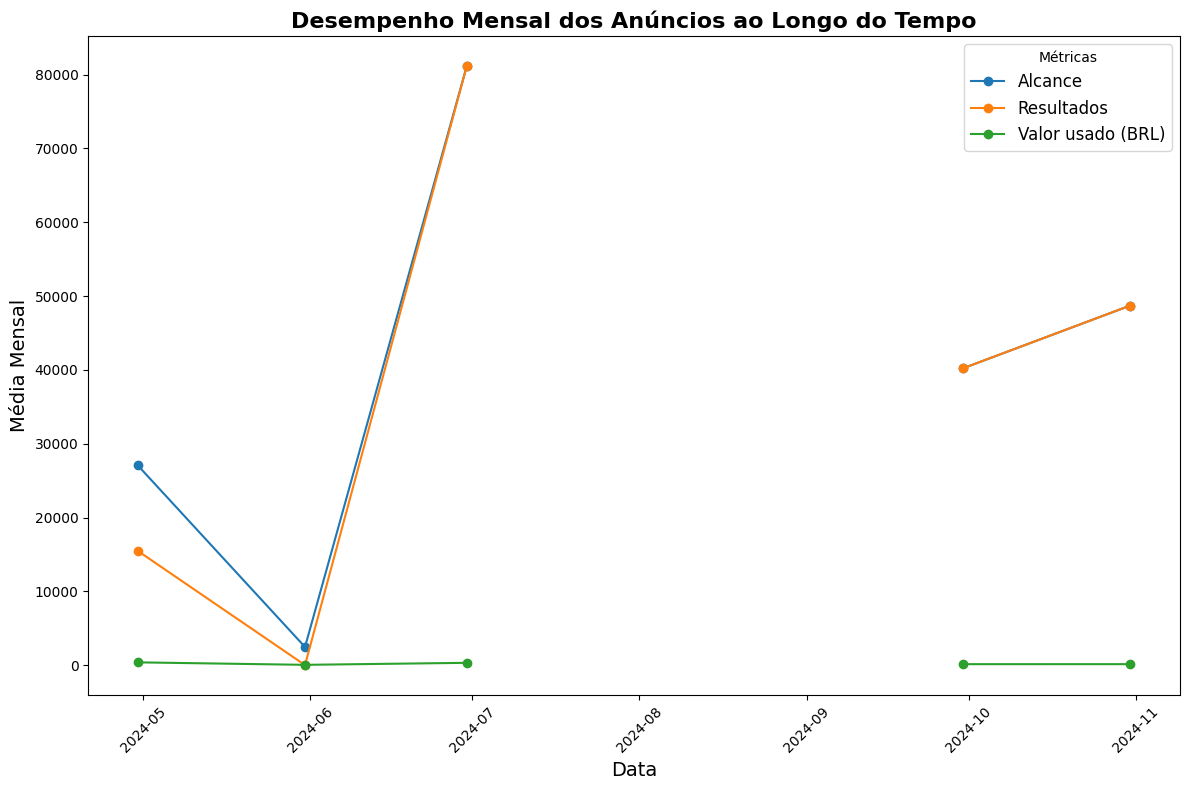

In [16]:
# Converter a coluna 'Data de Criação' para o formato datetime
df['Data de Criação'] = pd.to_datetime(df['Data de Criação'], format='%d/%m/%Y', errors='coerce')

# Filtrar linhas onde 'Data de Criação' não pôde ser convertida para uma data válida
df = df.dropna(subset=['Data de Criação'])

# Selecionar apenas colunas numéricas para o cálculo da média mensal
numeric_cols = df.select_dtypes(include=['number']).columns
monthly_performance = df.set_index('Data de Criação').resample('M')[numeric_cols].mean()[['Alcance', 'Resultados', 'Valor usado (BRL)']]

# Plotar as tendências mensais
plt.figure(figsize=(12, 8))
for column in monthly_performance.columns:
    plt.plot(monthly_performance.index, monthly_performance[column], marker='o', label=column)

# Configurações do gráfico
plt.title('Desempenho Mensal dos Anúncios ao Longo do Tempo', fontsize=16, fontweight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Média Mensal', fontsize=14)
plt.legend(title='Métricas', fontsize=12)
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()


**15. Indicadores-Chave para Avaliar o que Está Funcionando e o que Precisa de Ajustes**

In [17]:
# Filtrar as linhas onde 'Contatos por mensagem' ou 'Novos contatos de mensagem' são maiores que 0
contacts_df = df[(df['Contatos por mensagem'] > 0) | (df['Novos contatos de mensagem'] > 0)][['Nome do anúncio', 'Contatos por mensagem', 'Novos contatos de mensagem']]

# Exibir a tabela filtrada
contacts_df.sort_values(by='Novos contatos de mensagem', ascending=False)

,Nome do anúncio,Contatos por mensagem,Novos contatos de mensagem
6,AD - 05 - CARROSSEL ST - 24/05/2024,0.0,18.0
2,AD 01 - CARROSSEL FEED - 05/06/2024,1.0,5.0
9,AD 05 - CARROSSEL ST - 24/05/2024,0.0,5.0
14,AD - 02 - CARROSSEL ST - 24/05/2024,0.0,3.0
1,AD 01 - CARROSSEL - 18/06/2024,2.0,2.0
19,AD 02 - CARROSSEL ST - 24/05/2024,0.0,2.0
17,AD - 03 - CARROSSEL ST - 24/05/2024,0.0,1.0


In [18]:
df[['Nome do anúncio', 'Classificação de qualidade']]


,Nome do anúncio,Classificação de qualidade
0,AD 01 - VÍDEO STORIES - 04/04/24,–
1,AD 01 - CARROSSEL - 18/06/2024,–
2,AD 01 - CARROSSEL FEED - 05/06/2024,–
3,AD 01 - VIDEO - 16/09/2024,Acima da média
4,AD 01 - VIDEO - 01/10/2024,Acima da média
6,AD - 05 - CARROSSEL ST - 24/05/2024,–
7,AD 01 - VIDEO - 16/09/2024,Acima da média
9,AD 05 - CARROSSEL ST - 24/05/2024,–
10,AD 01 - VÍDEO STORIES - 04/04/24,–
11,AD 01 - STORY - 16/10/2024,Na média


In [19]:
df[['Nome do anúncio', 'Engajamento com a Página']].sort_values(by='Engajamento com a Página', ascending=False)

,Nome do anúncio,Engajamento com a Página
0,AD 01 - VÍDEO STORIES - 04/04/24,17748.0
3,AD 01 - VIDEO - 16/09/2024,6643.0
4,AD 01 - VIDEO - 01/10/2024,4955.0
10,AD 01 - VÍDEO STORIES - 04/04/24,3348.0
7,AD 01 - VIDEO - 16/09/2024,2441.0
16,AD 02 - VIDEO - 16/09/2024,1388.0
13,AD 01 - VIDEO - 16/09/2024,1314.0
2,AD 01 - CARROSSEL FEED - 05/06/2024,381.0
23,AD 02 - VIDEO - 16/09/2024,360.0
1,AD 01 - CARROSSEL - 18/06/2024,262.0
